In [20]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [2]:
with open('tweets.pickle', 'rb') as f:
    tweets = pickle.load(f)

## Vista general

In [3]:
users = list(tweets.keys())
cant_x_user = []
for i in tweets.values():
    cant_x_user.append(len(i))
    

In [4]:
df_nTw = pd.DataFrame({'Politico': users, 'Cantidad': cant_x_user})


In [5]:
df_nTw.sort_values('Cantidad', ascending=False)

,Politico,Cantidad
4,@horaciorlarreta,7910
1,@alferdez,3448
3,@PatoBullrich,2415
2,@CFKArgentina,2023
0,@JMilei,1390


Podemos ver que el politico con mas menciones fue Horacio Larreta con 7910 menciones, seguido del actual presidente, Bulrich, la tambien actual vicepresidente y por ultimo el candidato javier Milei.

In [6]:
def ploteo(user):
    tweets[user].Sentimiento.value_counts().plot(kind = 'barh')

## Javier Milei

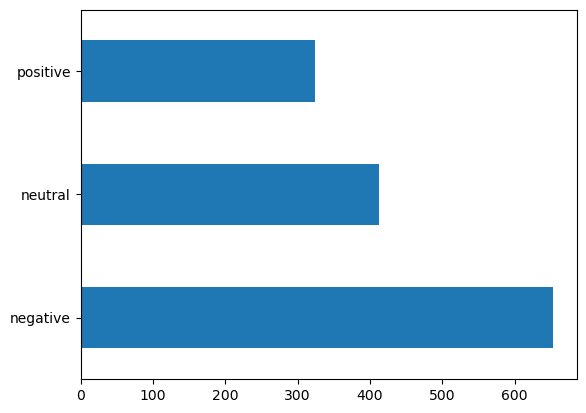

In [7]:
ploteo("@JMilei")

## Larreta

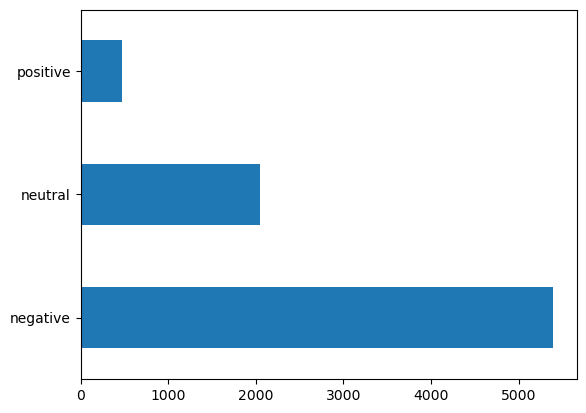

In [8]:
ploteo('@horaciorlarreta')

## Alberto Fernandez

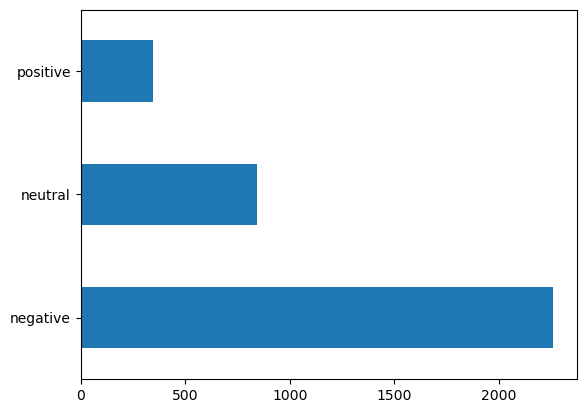

In [9]:
ploteo('@alferdez')

## CFK

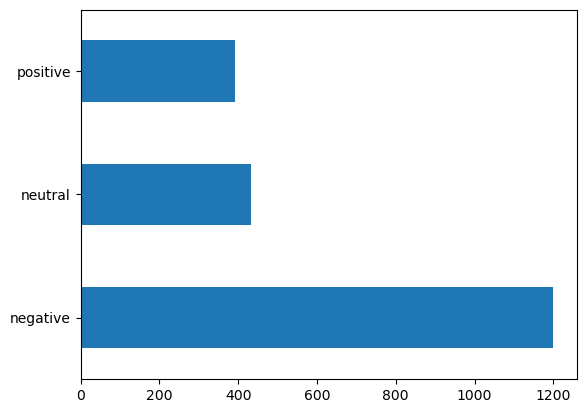

In [10]:
ploteo('@CFKArgentina')

## Bullrich

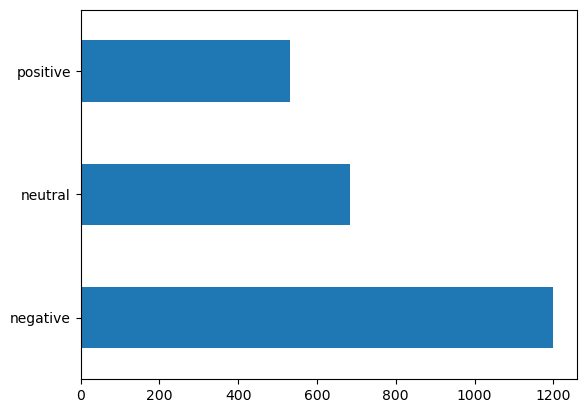

In [11]:
ploteo('@PatoBullrich')

## Ratio positivo/total y negativo/total

In [12]:
def ratio(freq, total):
    return (round((freq / total)  * 100, 2))

In [13]:
def enlistar(politico):
    lista = list(tweets[politico].Sentimiento.value_counts())
    return lista[0], lista[1], lista[2]

In [14]:
tabla = pd.DataFrame({'Politico': users})

In [15]:
for i in tabla.Politico:
    tabla['Negativo'], tabla['Neutro'], tabla['Positivo'] = enlistar(str(i))

In [31]:
for i, row in tabla.iterrows():
    politico = row['Politico']
    
    neg, neut, pos = enlistar(str(politico))
    n = neg + neut + pos
    rneg, rpos, rneu = ratio(neg, n), ratio(pos, n), ratio(neut, n)
    tabla.loc[i, 'Negativo'] = neg
    tabla.loc[i, 'Neutro'] = neut
    tabla.loc[i, 'Positivo'] = pos
    tabla.loc[i, 'Ratio Negativo'] = rneg
    tabla.loc[i, 'Ratio Positivo'] = rpos
    tabla.loc[i, 'Ratio Neutro'] = rneu

## Politico con mejor imagen positiva: 

In [40]:
df_pos = tabla.sort_values('Ratio Positivo', ascending = False)
df_pos

,Politico,Negativo,Neutro,Positivo,Ratio negativo,Ratio Positivo,Ratio Negativo,Ratio Neutro
0,@JMilei,653,413,324,46.98,23.31,46.98,29.71
3,@PatoBullrich,1199,685,531,49.65,21.99,49.65,28.36
2,@CFKArgentina,1199,433,391,59.27,19.33,59.27,21.40
1,@alferdez,2259,842,347,65.52,10.06,65.52,24.42
4,@horaciorlarreta,5393,2048,469,68.18,5.93,68.18,25.89


## Politico con peor imagen: 

In [33]:
tabla.sort_values('Ratio negativo', ascending = False)

,Politico,Negativo,Neutro,Positivo,Ratio negativo,Ratio Positivo,Ratio Negativo,Ratio Neutro
4,@horaciorlarreta,5393,2048,469,68.18,5.93,68.18,25.89
1,@alferdez,2259,842,347,65.52,10.06,65.52,24.42
2,@CFKArgentina,1199,433,391,59.27,19.33,59.27,21.40
3,@PatoBullrich,1199,685,531,49.65,21.99,49.65,28.36
0,@JMilei,653,413,324,46.98,23.31,46.98,29.71


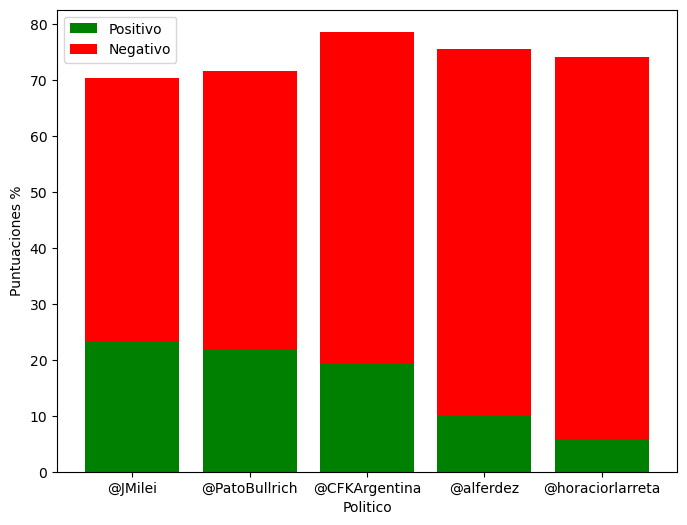

In [49]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(df_pos['Politico'], df_pos['Ratio Positivo'], label='Positivo', color = 'green')
ax.bar(df_pos['Politico'], df_pos['Ratio Negativo'], bottom = df_pos['Ratio Positivo'], label='Negativo', color = 'red')
#ax.bar(tabla['Politico'], tabla['Ratio Neutro'], bottom = tabla['Ratio Positivo'] + tabla['Ratio Negativo'], label='Neutro')

ax.set_xlabel('Politico')
ax.set_ylabel('Puntuaciones %')
ax.legend()
plt.savefig('barras.png')

<Figure size 640x480 with 0 Axes>